# Projet GouvImmo, partie 2: Trie des données

### Introduction:

Ce notebook à pour but d'effectuer un premier tri des données pour répondre à notre problématique, dans le cadre du projet fil rouge "GouvImmo" chez Datascientest. 

### Problématique :

Utilisateur ciblé: le particulier cherchant à acheter ou vendre un bien immobilier.

Objectif principale: Dans le cadre d’un achat ou d’une vente immobilière:
- Calculer grace à un modèle de régression le prix au m² d’un bien immobilier de type : Maison ou Appartement ou Terrain à  bâtir, en s’appuyant sur une liste de critères issus des données du site GouvImmo, tels que : la valeur foncière, la surface, le nombre de pièces, la localisation, la présence ou non de biens secondaires (terrains, dépendances)...
- Positionner le prix ainsi déterminé par rapport au prix moyen du m2 dans le quartier, ou dans la commune.

Objectifs secondaires : Si le temps nous le permet, ajouter aux critères GouvImmo initiaux ci-dessus, des critères d’équipements de proximité issus des données de l’INSEE, tels que : présence d’établissements scolaires, de commerces, de transports... dans le quatier, ou dans la commune.

### Jeu de données:

Dans un souci d'optimisation du temps de traitement machine, nous avons décidé de nous focaliser sur la région Ile de France, sur les 3 dernières années disponibles: 2019 à 2021. En effet, nous avons estimé que la région Ile de France disposerait de suffisamment de données pour permettre l'entrainement d'un modèle de régression, et que dans le cadre d'une estimation de prix, les années antérieures à 2019 ne sont pas pertinentes, au vu de l'évolution du prix de l'immobilier.

Les données ont été préalablement importés, fusionnées dans le notebook nommé gouvimmo_project_part1 et sauvegardés dans un fichier csv nommé IDF_2019_to_2021.csv

# Importation des librairies et du fichier de données en csv:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.pandas.set_option('display.max_columns',None)

In [ ]:
# Importer depuis le drive
path = "/content/drive/MyDrive/05-Livrable/01-Étape_1  Audit des données + DataViz’ 28 04/Bases de données csv/IDF_2019_to_2021.csv"
pd.read_csv(path).head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14,16,17,18,20,22,24,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2019-1499564,2019-01-04,1,Vente,1196000.0,17.0,NaN,RUE DUPHOT,2999,75001.0,75101,Paris 1er Arrondissement,75,NaN,NaN,75101000BC0014,NaN,NaN,21,106.85,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,112.0,3.0,NaN,NaN,NaN,NaN,NaN,2.325288,48.868416
1,2019-1499565,2019-01-03,1,Vente,1570490.0,13.0,NaN,RUE DE THORIGNY,9298,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AL0015,NaN,NaN,182,NaN,50.0,102.8,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,104.0,3.0,NaN,NaN,NaN,NaN,NaN,2.363076,48.860305
2,2019-1499565,2019-01-03,1,Vente,1570490.0,13.0,NaN,RUE DE THORIGNY,9298,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AL0015,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.363076,48.860305


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exemple: 
utilisation de Colab

In [ ]:
df=pd.read_csv(r"C:\Users\lucas.dejode\OneDrive - Erytech\Bureau\Formation data analyst\govimmo\database\IDF_2019_to_2021.csv")
df.head()

C:\Users\lucas.dejode\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (14,16,17,18,20,22,24,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2019-1499564,2019-01-04,1,Vente,1196000.0,17.0,NaN,RUE DUPHOT,2999,75001.0,75101,Paris 1er Arrondissement,75,NaN,NaN,75101000BC0014,NaN,NaN,21,106.85,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,112.0,3.0,NaN,NaN,NaN,NaN,NaN,2.325288,48.868416
1,2019-1499565,2019-01-03,1,Vente,1570490.0,13.0,NaN,RUE DE THORIGNY,9298,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AL0015,NaN,NaN,182,NaN,50.0,102.8,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,104.0,3.0,NaN,NaN,NaN,NaN,NaN,2.363076,48.860305
2,2019-1499565,2019-01-03,1,Vente,1570490.0,13.0,NaN,RUE DE THORIGNY,9298,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AL0015,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.363076,48.860305
3,2019-1499566,2019-01-08,1,Vente,100000.0,1.0,NaN,RUE MAGELLAN,5903,75008.0,75108,Paris 8e Arrondissement,75,NaN,NaN,75108000AP0016,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.300028,48.869577
4,2019-1499567,2019-01-03,1,Vente,5400.0,79.0,NaN,RUE DES GRAVILLIERS,4302,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AV0022,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,21.0,1.0,NaN,NaN,NaN,NaN,NaN,2.353479,48.864674


A la lecture de la documentation fournie par le site de Gouvimmo, et après une première audite des données brutes, nous pouvons faire les constatations suivantes:
- Chaque mutations (ventes) est identifiée par un numéro unique.
- Une même mutation peut être constituée de plusieurs lignes. Chaque ligne décrit un bien vendu dans la même mutation.
- Les différents types de biens sont répartit dans trois colonnes de type object, à plusieurs modalités. 
- Une première colonne décrit les biens construits, et comporte 4 modalités: Maisons, appartement, dépendance et local industriel ou commercial.
- Deux autres colonnes décrivent le type de terrain. On y trouve notemment la mention de terrain à bâtir. 
- La valeur foncière (valeur de la vente) n'est pas détaillée pour chaque ligne. Seule le montant totale est renseigné, et est répété dans chaque lignes.
- Un certain nombre de mutations comportent un très grand nombre de lignes, avec plusieurs appartements ou maisons, et de nombreux terrains annexes et dépendances. Ces mutations apparaissent difficiles à traiter, du fait de l'abscence du détail de la valeur foncière pour chacuns de ces biens.
- La variable cible souhaité (prix / m²) n'existe pas nativement dans le jeu de données. Elle devra être créée à partire des variables de valeur foncière et de surfaces.

Au regard de ces constats et de l'utilisateur cible que nous avons choisit, nous avons opté pour la stratégie suivante:
- Ne pas conserver les mutations comportant un local industriel ou commercial, qui nous semble hors scope.
- Ne pas conserver les mutations ne comportant qu'une dépendance ou autre terrain, non associé à un bien principale
- Ne conserver que les mutations comportant au maximum 1 maison OU 1 appartement OU 1 terrain à bâtir. Nous considèrerons ces 3 types de biens comme les biens principaux pour notre problématique.
- En plus de ce bien principale, nous ne conserverons que les mutations incluant au maximum 2 dépendances et / ou 2 terrains secondaires (autre que terrain à bâtir). Nous avons décidé de façon arbitraire que les mutations comportant plus de 2 dépendances et / ou 2 terrains secondaires seraient trop éloignées d'une vente "classique" pour un particulier, et trop difficiles à traiter dans un modèle de régression. De plus, ces mutations ne représentent qu'une faible part du jeu de données totale. Nous considèrerons les terrains secondaires et les dépendances comme les biens secondaires pour notre problématique.
- Considérer le nombre de dépendances et terrains secondaires comme des critères supplémentaires expliquant le prix de vente du bien principale, sans tenir compte de leur surfaces ou carractéristiques respective.
- Ne pas conserver les mutations ne correspondant pas à des ventes.

Ces différents critères nous permettrons de ne conserver que des mutations faciles à traiter, représentatives de la majorité des cas de ventes, et nous estimons qu'ils permettrons l'entrainement d'un modèle de régression de façon efficace.

# Préparation et premier nettoyage du dataframe:

### Préparation:

Dans le but d'effectuer ce tri, nous allons commencer par regrouper tous les types de terrains autre que "terraine à bâtir" en une seule modalité "Autre terrain", puis dichotomiser les différentes modalités des terrains et constructions. 

Cette opération nous permettra par la suite de compter le nombre de chaque type de biens pour chaque mutations, et ainsi faire le trie.

In [ ]:
#Transformation des types de terrains autre que terrains à bâtir en "autre"
df.loc[(df["nature_culture"]!="terrains a bâtir") & (df["nature_culture"].isna()==False), "nature_culture"]="Autre terrain"
df["nature_culture"].value_counts(dropna=False)

NaN                 725814
Autre terrain       355381
terrains a bâtir     22737
Name: nature_culture, dtype: int64

In [ ]:
#Dichotomisation des types de locaux
df = df.join(pd.get_dummies(df['type_local']))
df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison
0,2019-1499564,2019-01-04,1,Vente,1196000.0,17.0,NaN,RUE DUPHOT,2999,75001.0,75101,Paris 1er Arrondissement,75,NaN,NaN,75101000BC0014,NaN,NaN,21,106.85,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,112.0,3.0,NaN,NaN,NaN,NaN,NaN,2.325288,48.868416,1,0,0,0
1,2019-1499565,2019-01-03,1,Vente,1570490.0,13.0,NaN,RUE DE THORIGNY,9298,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AL0015,NaN,NaN,182,NaN,50.0,102.8,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,104.0,3.0,NaN,NaN,NaN,NaN,NaN,2.363076,48.860305,1,0,0,0
2,2019-1499565,2019-01-03,1,Vente,1570490.0,13.0,NaN,RUE DE THORIGNY,9298,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AL0015,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.363076,48.860305,0,1,0,0
3,2019-1499566,2019-01-08,1,Vente,100000.0,1.0,NaN,RUE MAGELLAN,5903,75008.0,75108,Paris 8e Arrondissement,75,NaN,NaN,75108000AP0016,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.300028,48.869577,0,1,0,0
4,2019-1499567,2019-01-03,1,Vente,5400.0,79.0,NaN,RUE DES GRAVILLIERS,4302,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AV0022,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,21.0,1.0,NaN,NaN,NaN,NaN,NaN,2.353479,48.864674,1,0,0,0


Dans de nombreux cas, une même ligne contiens un bien construit (maison ou appartement), mais également un terrain à bâtir (qui à servi de support à la construction). Elles peuvent également comporter un terrain autre (Un jardin par exemple). Pour que ces lignes soient bien considérées comme des biens construits et non comme des terrains vides, nous allons créer les variables "terrain à bâtir" et "autre terrain" en ne considérant que les lignes ne comportant pas de maison ou appartement. 

In [ ]:
#Création de colonnes terrains_a_batir (= ligne terrain à bâtir ne contenant pas d'appartement ou de maison)
df.loc[(df["nature_culture"]=="terrains a bâtir") & ((df["Appartement"]+df["Maison"]+df["Dépendance"]==0)), "terrains_a_batir"]=1

#Création de colonnes terrains_autre (= ligne autre terrain ne contenant pas d'appartement ou de maison)
df.loc[(df["nature_culture"]=="Autre terrain") & ((df["Appartement"]+df["Maison"]+df["Dépendance"]==0)), "terrains_autre"]=1


df[["terrains_a_batir", "terrains_autre"]] = df[["terrains_a_batir", "terrains_autre"]].fillna(0)

display(df.head())
display(df["terrains_a_batir"].value_counts(dropna=False))
display(df["terrains_autre"].value_counts(dropna=False))

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison,terrains_a_batir,terrains_autre
0,2019-1499564,2019-01-04,1,Vente,1196000.0,17.0,NaN,RUE DUPHOT,2999,75001.0,75101,Paris 1er Arrondissement,75,NaN,NaN,75101000BC0014,NaN,NaN,21,106.85,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,112.0,3.0,NaN,NaN,NaN,NaN,NaN,2.325288,48.868416,1,0,0,0,0.0,0.0
1,2019-1499565,2019-01-03,1,Vente,1570490.0,13.0,NaN,RUE DE THORIGNY,9298,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AL0015,NaN,NaN,182,NaN,50.0,102.8,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,104.0,3.0,NaN,NaN,NaN,NaN,NaN,2.363076,48.860305,1,0,0,0,0.0,0.0
2,2019-1499565,2019-01-03,1,Vente,1570490.0,13.0,NaN,RUE DE THORIGNY,9298,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AL0015,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.363076,48.860305,0,1,0,0,0.0,0.0
3,2019-1499566,2019-01-08,1,Vente,100000.0,1.0,NaN,RUE MAGELLAN,5903,75008.0,75108,Paris 8e Arrondissement,75,NaN,NaN,75108000AP0016,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.300028,48.869577,0,1,0,0,0.0,0.0
4,2019-1499567,2019-01-03,1,Vente,5400.0,79.0,NaN,RUE DES GRAVILLIERS,4302,75003.0,75103,Paris 3e Arrondissement,75,NaN,NaN,75103000AV0022,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,21.0,1.0,NaN,NaN,NaN,NaN,NaN,2.353479,48.864674,1,0,0,0,0.0,0.0


0.0    1082506
1.0      21426
Name: terrains_a_batir, dtype: int64

0.0    977931
1.0    126001
Name: terrains_autre, dtype: int64

### Nettoyage: Lignes non associée à un bien principale ou secondaire:

Nous allons vérifier si toutes les lignes de notre dataframe sont associées à un bien principale (maison / appartement / terrain à bâtir) ou secondaire (terrain autre / dapendance), ou si certaines lignes ne sont rattachées à aucun de ces types de biens:

In [ ]:
#Nombre de mutations comportant des lignes ne correspondant pas à un bien principale ou secondaire:
df[(df["Appartement"]+df["Dépendance"]+df["Maison"]+df["terrains_a_batir"]+df["terrains_autre"])==0].shape[0]

189338

Nous constatons qu'il y a des mutations comportant des lignes ne correspondant pas à un bien principale ou secondaire. Il s'agit probablement de mutations comportant des biens de type industriel ou commercial, ou à des mutations pour lesquelles certaines lignes n'ont pas été correctement complétés à la vente. Ces mutations risquent d'êtres difficilement interprétables et doivent être retirées.

Pour supprimer totalement les mutations consernées, nous allons donc récupérer la liste de leurs ID de mutation, et filtrer le dataframe avec cette liste.

In [ ]:
#Récupération de la liste des mutations consernées:
toremove=df[(df["Appartement"]+df["Dépendance"]+df["Maison"]+df["terrains_a_batir"]+df["terrains_autre"])==0]["id_mutation"].unique()

In [ ]:
#Retrait des mutations consernées dans le dataframe:
df=df.loc[df["id_mutation"].isin(toremove)==False]

In [ ]:
#Vérification après nettoyage:
df[(df["Appartement"]+df["Dépendance"]+df["Maison"]+df["terrains_a_batir"]+df["terrains_autre"])==0].shape[0]

0

### Nettoyage: Valeur foncières par mutations:

Selon la documentation de Gouvimmo, nous nous attendons à ce que la valeur foncière représente le prix de vente totale et soit identique pour chaque lignes d'une même mutation. Ce postulat est important pour nous permettre ensuite de calculer le prix / m². Nous allons vérifier que cette règle est bien respecté.

In [ ]:
#Vérification que la valeur foncière est systématiquement la même indiqué pour toute les lignes d'une même mutation:
valeur_fonciere=df[["id_mutation", "valeur_fonciere"]].groupby('id_mutation' , as_index = True).agg({"valeur_fonciere": ["mean", "min", "max"]})

print("Nombre de mutations avec des valeurs foncières différentes renseignées pour une même mutation: ", 
      sum(valeur_fonciere["valeur_fonciere"]["mean"]!=valeur_fonciere["valeur_fonciere"]["max"]))

Nombre de mutations avec des valeurs foncières différentes renseignées pour une même mutation:  718


Nous constatons que cette règle n'est pas respecté pour certaines mutations. Nous devons les retirer de notre jeu de données. Nous allons donc récupérer la liste des ID de mutations consernées pour filtrer notre dataframe.

In [ ]:
#Récupération de la liste des mutations consernées:
toremove=valeur_fonciere[(valeur_fonciere["valeur_fonciere"]["mean"]!=valeur_fonciere["valeur_fonciere"]["max"])==True].index

#Suppression des mutations consernées:
df=df.loc[df["id_mutation"].isin(toremove)==False]

#Vérification après nettoyage:
valeur_fonciere=df[["id_mutation", "valeur_fonciere"]].groupby('id_mutation' , as_index = True).agg({"valeur_fonciere": ["mean", "min", "max"]})

print("Nombre de mutations avec des valeurs foncières différentes renseignées pour une même mutation: ", 
      sum(valeur_fonciere["valeur_fonciere"]["mean"]!=valeur_fonciere["valeur_fonciere"]["max"]))

Nombre de mutations avec des valeurs foncières différentes renseignées pour une même mutation:  0


### Nettoyage: Etude des NaN:

In [ ]:
pd.DataFrame(df.isnull().sum() * 100 / len(df), columns = ["% missing"]).sort_values(by="% missing")

,% missing
id_mutation,0.000000
Maison,0.000000
Local industriel. commercial ou assimilé,0.000000
Dépendance,0.000000
Appartement,0.000000
nombre_lots,0.000000
terrains_a_batir,0.000000
id_parcelle,0.000000
code_departement,0.000000
nom_commune,0.000000


Nous constatons que certaines colonnes ne sont pas pertinentes pour notre dataframe:
- La colonne numero_volume est totalement vide et peut être retiré.
- Les colonnes ancien_code_commune, ancien_nom_commune, ancien_id_parcelle, nature_culture_speciale et code_nature_culture_speciale sont peu utiles au calcul du prix d'un bien et très largements vides. Elles peuvent être supprimées.

In [ ]:
#Suppression des colonnes innutiles:
df=df.drop(['numero_volume',
            "ancien_code_commune",
            "ancien_nom_commune",
            "ancien_id_parcelle",
            "nature_culture_speciale",
            "code_nature_culture_speciale"], axis=1)

### Nettoyage: Etude des colonnes surface carrez:

Notre jeu de données comporte 10 colonnes indiquant un numéro de lot et une surface carrez correspondante. La lecture de la documentation de Gouvimmo nous indique qu'un lot correspond à une subdivision d'un immeuble (exemple: un appartement). Le numéro corresponds au N° de porte, et n'est guère pertinent pour la détermination de notre variable cible. La surface carrez est une méthode de calcul de surface habitable et pourrait être pertinent pour la détermination de notre variable cible.

Cependant, nous constatons que ces colonnes surface carrez sont très majoritairement vides. De plus, la documentation de Gouvimmo nous indique également que pour les mutations comportant plus de 5 lots, les lots au delà du 5ème ne sont pas renseignés. Nous avons donc des données très partielles.

Nous disposons en revanche d'une autre donnée: La surface réelle du bâtiment. Nous allons vérifier si cette donnée est correctement renseignée dans les lignes correspondants à un bien construit (maison ou appartement):

In [ ]:
n_ligne_construit = df[(df["Appartement"]+df["Maison"])!=0].shape[0]
n_ligne_construit_surface_NaN = df[((df["Appartement"]+df["Maison"])!=0) & 
                                        (df["surface_reelle_bati"].isnull()==True)].shape[0]
print("% surface bâtiment manquant pour les biens construits:", np.round(n_ligne_construit_surface_NaN/n_ligne_construit*100, 4), "%")

% surface bâtiment manquant pour les biens construits: 0.0027 %


La variable surface réelle bâtiment ne comporte que très peu de valeurs manquantes pour les lignes décrivant un bâtiment. Selon la documentation, il s'agit de la surface habitable. Cele ci n'est pas calculée de la même façon que la surface carrez, mais reste assez proche. Nous allons vérifier si les surfaces carrez renseignées dans notre jeu de données sont comparables à la surface habitable. Auquel cas, nous pourrons supprimer les colonnes surface carrez, et n'utiliser que la colonne surface réelle bâtiment.

In [ ]:
#Extraction des lignes contenant au moins une surface carrez:
carrez=df[(df["lot5_surface_carrez"].isnull()==False) |
          (df["lot4_surface_carrez"].isnull()==False) |
          (df["lot3_surface_carrez"].isnull()==False) |
          (df["lot2_surface_carrez"].isnull()==False) |
          (df["lot1_surface_carrez"].isnull()==False)][["lot1_surface_carrez",
                                                        "lot2_surface_carrez",
                                                        "lot3_surface_carrez",
                                                        "lot4_surface_carrez",
                                                        "lot5_surface_carrez",
                                                        "surface_reelle_bati"]]
carrez=carrez.dropna(axis = 0, how = 'all', subset = ["surface_reelle_bati"])

In [ ]:
#Moyenne des surfaces carrez indiquées pour les lots 1 à 5 et différence avec la surface réelle bâtiment:
carrez["mean_carrez"]=carrez.mean(axis=1, skipna=None)

carrez["difference_carrez_surface_reele"]=carrez["surface_reelle_bati"]-carrez["mean_carrez"]
carrez["difference_carrez_surface_reele"].describe()

count    225266.000000
mean         -0.410818
std          18.236742
min       -4504.500000
25%          -0.665000
50%          -0.100000
75%           0.510000
max         219.990000
Name: difference_carrez_surface_reele, dtype: float64

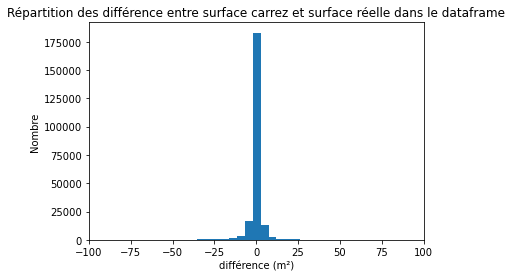

In [ ]:
plt.hist(carrez["difference_carrez_surface_reele"], bins=1000)
plt.xlim([-100,100])
plt.xlabel("différence (m²)")
plt.ylabel("Nombre")
plt.title("Répartition des différence entre surface carrez et surface réelle dans le dataframe");

Nous constatons que Les surfaces carrez sont effectivement presque systématiquement sensiblements égales à la surface réelle batiment. Nous pouvons donc nous passer de ces colonnes, ainsi que des colonnes numero_lot.

In [ ]:
#Suppression des colonnes lotx_surface_carrez et lotx_numero:

df=df.drop(["lot1_surface_carrez",
            "lot2_surface_carrez",
            "lot3_surface_carrez",
            "lot4_surface_carrez",
            "lot5_surface_carrez", 
            "lot1_numero",
            "lot2_numero",
            "lot3_numero",
            "lot4_numero",
            "lot5_numero"], axis=1)

Pour finir, les colonnes code_type_local, type_local, code_nature_culture et nature_culture ont été dichotomisées et ne sont donc plus utiles car redondantes avec les colonnes créées par dichotomisation. Elles peuvent donc être retirées.

In [ ]:
#Suppression des colonnes code_type_local, type_local, code_nature_culture et nature_culture:

df=df.drop(["code_type_local", "type_local", "code_nature_culture", "nature_culture"], axis=1)

# Creation du dataframe concaténant les données pour chaque mutations:

Afin de pouvoir étudier correctement le prix de vente en fonction de toute les caractéristiques de chaque mutations, nous souhaitons regrouper les données afin de n'avoir plus qu'une seule ligne par mutation. Nous allons appliquer la stratégie suivante:
- Les lignes seront regroupés par id de mutation par la méthode groupby.
- La valeur foncière totale étant recopiée sur chaque ligne d'une même mutation, celle ci sera regroupé en utilisant "mean" avec la méthode groupby.
- Le nombre_lots, surface_reelle_bati, nombre_pieces_principales, surface_terrain et les données dichotomisées seront regroupés en utilisant "sum" avec la méthode groupby.
- Les données relatives à date_mutation, numero_disposition, nature_mutation, addresse complète, N° de parcelle, longitude et latitude seront conservées uniquement pour le bien principale (maison, appartement ou terrain à bâtir). En cas de mutations comportant des données différentes pour un terrain autre ou une dépendance qui serait rattachée à ce bien principale (par exemple: Une dépendance à une addresse postale différente de celle du bien principale), ces informations ne seront pas conservées.

Pour ces dernières données (données en type object), nous allons donc commencer par les supprimer des lignes ne correspondant pas à un bien principale. Nous pourrons ensuite récupérer les données des biens principaux en utilisant "first" avec la méthode groupby.

In [ ]:
#Suppression des données relatives à date_mutation, numero_disposition, nature_mutation, addresse complète, 
#N° de parcelle, longitude et latitude pour les lignes non rattachées à une maison, un appartement ou un terrain à bâtir:

df.loc[(df["Appartement"]+
           df["Maison"]+
           df["terrains_a_batir"])==0, ["date_mutation",
                                        "numero_disposition", 
                                        "nature_mutation", 
                                        "adresse_numero",
                                        "adresse_suffixe",
                                        "adresse_nom_voie",
                                        "adresse_code_voie",
                                        "code_postal",
                                        "code_commune",
                                        "nom_commune",
                                        "code_departement",
                                        "id_parcelle",
                                        "longitude",
                                        "latitude"]]=None

Nous pouvons maintenant regrouper les mutations avec la méthode groupby sur l'ID de mutation.

In [ ]:
#Création du dataframe groupé par ID de mutation:
df=df.groupby('id_mutation' , as_index = False).agg({"valeur_fonciere": "mean",
                                                    "date_mutation": "first",
                                                    "numero_disposition": "first",
                                                    "nature_mutation": "first",
                                                    "adresse_numero": "first",
                                                    "adresse_suffixe": "first",
                                                    "adresse_nom_voie": "first",
                                                    "adresse_code_voie": "first",
                                                    "code_postal": "first",
                                                    "code_commune": "first",
                                                    "nom_commune": "first",
                                                    "code_departement": "first",
                                                    "id_parcelle": "first",
                                                    "nombre_lots": "sum",
                                                    "surface_reelle_bati": "sum",
                                                    "nombre_pieces_principales": "sum",
                                                    "surface_terrain": "sum",
                                                    "longitude": "first",
                                                    "latitude": "first",
                                                    "Appartement": "sum",
                                                    "Local industriel. commercial ou assimilé": "sum",
                                                    "Dépendance": "sum",
                                                    "Maison": "sum",
                                                    "terrains_a_batir": "sum",
                                                    "terrains_autre": "sum",
                                                    "date_mutation": "first"})


In [ ]:
df.head()

,id_mutation,valeur_fonciere,date_mutation,numero_disposition,nature_mutation,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,Appartement,Local industriel. commercial ou assimilé,Dépendance,Maison,terrains_a_batir,terrains_autre
0,2019-1135463,310000.0,2019-01-03,1.0,Vente,11.0,None,RUE DE LA FONTAINE,0650,77220.0,77215.0,Gretz-Armainvilliers,77.0,772150000B0473,0,101.0,4.0,855.0,2.740574,48.739669,0.0,0,0.0,1,0.0,1.0
1,2019-1135464,150000.0,2019-01-03,1.0,Vente,1491.0,None,AV DE LA GARE,0390,77310.0,77407.0,Saint-Fargeau-Ponthierry,77.0,77407000AD0345,0,144.0,6.0,1493.0,2.539824,48.563586,0.0,0,0.0,2,0.0,0.0
2,2019-1135466,155000.0,2019-01-04,1.0,Vente,4.0,None,AV DE LA GARE,0600,77340.0,77373.0,Pontault-Combault,77.0,77373000AD0157,2,51.0,2.0,0.0,2.616840,48.805639,1.0,0,1.0,0,0.0,0.0
3,2019-1135467,165500.0,2019-01-09,1.0,Vente,45.0,None,RUE LOUIS VICTOR DE BROGLIE,1413,77176.0,77445.0,Savigny-le-Temple,77.0,77445000YA0444,3,64.0,3.0,12.0,2.565832,48.605740,1.0,0,2.0,0,0.0,0.0
4,2019-1135468,269000.0,2019-01-02,1.0,Vente,6.0,None,RUE JEAN FERRAT,0492,77310.0,77407.0,Saint-Fargeau-Ponthierry,77.0,77407000AY0353,0,84.0,4.0,270.0,2.553743,48.530118,0.0,0,0.0,1,0.0,2.0


# Application des filtres:

Dans cette partie, nous applicons les filtres au dataframe selon la stratégie définie plus haut: 
- Suppression des mutations comportant des locaux industriels ou commercial
- Suppression des mutations ne comportant pas de bien principale (maison, appartement ou terrain à bâtir)
- Suppression des mutations comportant plus d'1 maison ou appartement ou terrain à bâtir
- Suppression des mutations comportant plus de 2 terrains secondaire ("autre terrain") et / ou dépendance
- Suppression es mutations ne correspondant pas à des ventes

In [ ]:
#Suppression des mutations comprenant un local industriel ou plus d'1 maison, terrain à bâtir ou appartement
df=df[(df["Local industriel. commercial ou assimilé"]==0) & ((df["Appartement"]+df["Maison"]+df["terrains_a_batir"])<=1)]

#Suppression des dépendances non associées à un terrain à bâtir, un appartement ou à une maison
df=df.drop(axis = 0, index=df[(df["Dépendance"]>0) & ((df["Appartement"]+df["Maison"]+df["terrains_a_batir"])==0)].index)

#Suppression des terrains autre non associées à un terrain à bâtir, un appartement ou à une maison
df=df.drop(axis = 0, index=df[(df["terrains_autre"]>0) & ((df["Appartement"]+df["Maison"]+df["terrains_a_batir"])==0)].index)

Concernant les dépendances et autre terrains, nous vérifions que la part des mutations entrant dans notre critère de 2 maximum représente une part suffisante des données:

In [ ]:
print("% de dispositions comportant maximum 2 terrains autre:", np.round(df[df["terrains_autre"]<=2].shape[0]/df.shape[0]*100, 2), "%")
print("% de dispositions comportant maximum 2 dépendances:", np.round(df[df["Dépendance"]<=2].shape[0]/df.shape[0]*100, 2), "%")

% de dispositions comportant maximum 2 terrains autre: 99.21 %
% de dispositions comportant maximum 2 dépendances: 99.23 %


In [ ]:
#Notre critère de 2 maximum représente 99% du jeu de données. Nous pouvons donc l'appliquer.
#Suppression des mutations comprenant plus de 2 terrains autre et / ou 2 dépendances:
df=df[df["terrains_autre"]<=2]
df=df[df["Dépendance"]<=2]

Après avoir appliqué notre stratégie de filtrage, nous nous attendons à ce que les mutations de notre dataframe comportent au maximum 1 bien principale + 0 à 2 terrains secondaires + 0 à 2 dépendances.

In [ ]:
#Vérification des carractéristiques de notre df:
df.iloc[:, 19:].describe()

,latitude,Appartement,Local industriel. commercial ou assimilé,Dépendance,Maison,terrains_a_batir,terrains_autre
count,370150.000000,371667.000000,371667.0,371667.000000,371667.000000,371667.000000,371667.000000
mean,48.833602,0.702570,0.0,0.430797,0.274550,0.022881,0.058609
std,0.135484,0.457128,0.0,0.604403,0.446288,0.149523,0.276644
min,48.125519,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,48.790168,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,48.853440,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,48.904704,1.000000,0.0,1.000000,1.000000,0.000000,0.000000
max,49.216561,1.000000,0.0,2.000000,1.000000,1.000000,2.000000


Nous avons bien au maximum 1 bien principale (maison, appartement ou terrain à bâtir) par mutation, associé à un maximum de 2 terrain secondaire et / ou 2 dépendance. Nous n'avons plus de local industriel. 

La colonne Local industriel commercial ou assimilé ne comporte maintenant que des 0 et peut être supprimée.

In [ ]:
#Suppression de la colonne local industriel:
df=df.drop("Local industriel. commercial ou assimilé", axis=1)

Nous nous occupons maintenant des natures de mutation. Nous affichons les différentes modalités de la variable:

In [ ]:
#Affichage des modalités des natures de mutations:
df["nature_mutation"].value_counts()

Vente                                 353265
Vente en l'état futur d'achèvement     16179
Adjudication                            1204
Vente terrain à bâtir                    522
Echange                                  457
Expropriation                             40
Name: nature_mutation, dtype: int64

# Pour ne conserver que les mutations de nature vente, nous supprimons celles correspondants à des échanges, expropriations ou adjudication.

In [ ]:
#Suppression des mutations correspondant à des échanges, expropriations ou adjudication:
df=df[(df["nature_mutation"]!="Echange") & (df["nature_mutation"]!="Expropriation") & (df["nature_mutation"]!="Adjudication")]

#Vérification après nettoyage:
df["nature_mutation"].value_counts()

Vente                                 353265
Vente en l'état futur d'achèvement     16179
Vente terrain à bâtir                    522
Name: nature_mutation, dtype: int64

Nous faisons maintenant une dernière vérification des NaN restants:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369966 entries, 0 to 468706
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_mutation                369966 non-null  object 
 1   valeur_fonciere            369966 non-null  float64
 2   date_mutation              369966 non-null  object 
 3   numero_disposition         369966 non-null  float64
 4   nature_mutation            369966 non-null  object 
 5   adresse_numero             361151 non-null  float64
 6   adresse_suffixe            24057 non-null   object 
 7   adresse_nom_voie           369964 non-null  object 
 8   adresse_code_voie          369966 non-null  object 
 9   code_postal                369960 non-null  float64
 10  code_commune               369966 non-null  float64
 11  nom_commune                369966 non-null  object 
 12  code_departement           369966 non-null  float64
 13  id_parcelle                36

Il reste des NaN dans les colonnes adresse_numero, adresse_nom_voie et adresse_suffixe. Ces NaN peuvent être des valeurs manquantes qui seraient auquel cas non récupérables, soit des valeurs inexistantes dans la réalité. Ces NaN seront donc laissé comme tel.

Il reste des NaN dans les colonnes longitude et latitude. Ces colonnes n'étant pas prévues comme des variables explicatives dans notre modèle pour le moment, nous décidons de ne pas les traiter pour le moment.

Il reste 6 NaN dans la colonne code_postal. Ceux ci peuvent être facilement récupérés via le nom de comune et la voie, ou le code commune.

In [ ]:
#Affichage des NaN dans la colonne code_postal:
df[df["code_postal"].isna()==True][["code_postal", "code_commune", "nom_commune", "adresse_nom_voie"]]

,code_postal,code_commune,nom_commune,adresse_nom_voie
38306,NaN,78674.0,Villepreux,RUE DES GOBELINS
44699,NaN,78551.0,Saint-Germain-en-Laye,AV DE LA FERME DES HEZARDS
44955,NaN,78551.0,Saint-Germain-en-Laye,AV PASTEUR
44968,NaN,78551.0,Saint-Germain-en-Laye,AV DE LA FERME DES HEZARDS
187534,NaN,75115.0,Paris 15e Arrondissement,RUE DE L ABBE GROULT
224929,NaN,78650.0,Le Vésinet,PL JOSEPHINE BAKER


Le code postale de Villepreux est le 78450;

Le code postale de Saint-Germain-en-Laye est le 78112 pour AV DE LA FERME DES HEZARDS et le 78100 pour AV PASTEUR;

Le code postale de Paris 15e Arrondissement est le 75015;

Le code postale de Le Vésinet est le 78110;

In [ ]:
#Remplacement des codes postaux NaN:
df.loc[(df["code_postal"].isna()==True) & (df["nom_commune"]=="Villepreux"), "code_postal"]=78450
df.loc[(df["code_postal"].isna()==True) & (df["nom_commune"]=="Saint-Germain-en-Laye") & (df["adresse_nom_voie"]=="AV DE LA FERME DES HEZARDS") ,"code_postal"]=78112
df.loc[(df["code_postal"].isna()==True) & (df["nom_commune"]=="Saint-Germain-en-Laye") & (df["adresse_nom_voie"]=="AV PASTEUR"), "code_postal"]=78100
df.loc[(df["code_postal"].isna()==True) & (df["nom_commune"]=="Paris 15e Arrondissement"), "code_postal"]=75015
df.loc[(df["code_postal"].isna()==True) & (df["nom_commune"]=="Le Vésinet"), "code_postal"]=78110

#Vérification du nettoyage:
df.loc[[38306, 44699, 44955, 44968, 187534, 224929]][["code_postal", "code_commune", "nom_commune", "adresse_nom_voie"]]

,code_postal,code_commune,nom_commune,adresse_nom_voie
38306,78450.0,78674.0,Villepreux,RUE DES GOBELINS
44699,78112.0,78551.0,Saint-Germain-en-Laye,AV DE LA FERME DES HEZARDS
44955,78100.0,78551.0,Saint-Germain-en-Laye,AV PASTEUR
44968,78112.0,78551.0,Saint-Germain-en-Laye,AV DE LA FERME DES HEZARDS
187534,75015.0,75115.0,Paris 15e Arrondissement,RUE DE L ABBE GROULT
224929,78110.0,78650.0,Le Vésinet,PL JOSEPHINE BAKER


# Creation de la valeur cible:

Nous pouvons maintenant créer notre variable cible: le prix / m². Pour cela, nous utilisons la valeur foncière, que nous divisons par la surface réelle bâtiment lorsque le bien principale est une maison ou un appartement, et par la surface de terrain lorsque le bien principale est un terrain à bâtir.

Pour éviter une division par 0, nous nous assurons au préalable de supprimer les éventuelles mutations dont la surface correspondante est égale à 0.

In [ ]:
#Suppression des mutations avec construction, dont la surface bâtiment est = 0
df=df.drop(df[(df["terrains_a_batir"]==0) & (df["surface_reelle_bati"]==0)].index)

#Suppression des mutations sans construction, dont la surface terrain est = 0
df=df.drop(df[(df["terrains_a_batir"]!=0) & (df["surface_terrain"]==0)].index)

In [ ]:
df.loc[df["terrains_a_batir"]==0, "prix_m²"]=np.round(df["valeur_fonciere"]/df["surface_reelle_bati"], 2)
df.loc[df["terrains_a_batir"]!=0, "prix_m²"]=np.round(df["valeur_fonciere"]/df["surface_terrain"], 2)

In [ ]:
#Réinitialisation de l'index pour le dataframe final:
df=df.reset_index(drop=True)
df.head()

,id_mutation,valeur_fonciere,date_mutation,numero_disposition,nature_mutation,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,Appartement,Dépendance,Maison,terrains_a_batir,terrains_autre,prix_m²
0,2019-1135463,310000.0,2019-01-03,1.0,Vente,11.0,None,RUE DE LA FONTAINE,0650,77220.0,77215.0,Gretz-Armainvilliers,77.0,772150000B0473,0,101.0,4.0,855.0,2.740574,48.739669,0.0,0.0,1,0.0,1.0,3069.31
1,2019-1135466,155000.0,2019-01-04,1.0,Vente,4.0,None,AV DE LA GARE,0600,77340.0,77373.0,Pontault-Combault,77.0,77373000AD0157,2,51.0,2.0,0.0,2.616840,48.805639,1.0,1.0,0,0.0,0.0,3039.22
2,2019-1135467,165500.0,2019-01-09,1.0,Vente,45.0,None,RUE LOUIS VICTOR DE BROGLIE,1413,77176.0,77445.0,Savigny-le-Temple,77.0,77445000YA0444,3,64.0,3.0,12.0,2.565832,48.605740,1.0,2.0,0,0.0,0.0,2585.94
3,2019-1135468,269000.0,2019-01-02,1.0,Vente,6.0,None,RUE JEAN FERRAT,0492,77310.0,77407.0,Saint-Fargeau-Ponthierry,77.0,77407000AY0353,0,84.0,4.0,270.0,2.553743,48.530118,0.0,0.0,1,0.0,2.0,3202.38
4,2019-1135469,199500.0,2019-01-08,1.0,Vente,3.0,None,RUE DE LA PICARDIE,0186,77720.0,77211.0,Grandpuits-Bailly-Carrois,77.0,772110170D0147,0,109.0,5.0,1036.0,2.993174,48.576719,0.0,0.0,1,0.0,2.0,1830.28


In [ ]:
df.describe()

,valeur_fonciere,numero_disposition,adresse_numero,code_postal,code_commune,code_departement,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,Appartement,Dépendance,Maison,terrains_a_batir,terrains_autre,prix_m²
count,3.699600e+05,369960.000000,361147.000000,369960.000000,369960.000000,369960.000000,369960.000000,369960.000000,369960.000000,369960.000000,368451.000000,368451.000000,369960.000000,369960.000000,369960.000000,369960.000000,369960.000000,3.699600e+05
mean,3.598535e+05,1.006841,115.712372,85850.238526,85768.772370,85.580103,1.636626,66.743329,3.068151,139.720886,2.353704,48.833519,0.702360,0.431022,0.274746,0.022894,0.058612,5.535344e+03
std,1.062438e+06,0.089049,811.459574,8437.215705,8338.985606,8.363471,1.313603,37.686017,1.530404,589.518229,0.222906,0.135534,0.457221,0.604516,0.446387,0.149567,0.276651,8.514596e+03
min,1.500000e-01,1.000000,1.000000,75001.000000,75101.000000,75.000000,0.000000,0.000000,0.000000,0.000000,1.453111,48.125519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.750000e+05,1.000000,7.000000,77210.000000,77215.000000,77.000000,0.000000,41.000000,2.000000,0.000000,2.249699,48.790116,0.000000,0.000000,0.000000,0.000000,0.000000,2.959180e+03
50%,2.660000e+05,1.000000,19.000000,91310.000000,91363.000000,91.000000,2.000000,63.000000,3.000000,0.000000,2.343072,48.853377,1.000000,0.000000,0.000000,0.000000,0.000000,4.243020e+03
75%,4.070205e+05,1.000000,47.000000,93350.000000,93059.000000,93.000000,2.000000,85.000000,4.000000,131.000000,2.462024,48.904596,1.000000,1.000000,1.000000,0.000000,0.000000,7.500000e+03
max,4.352450e+08,7.000000,9999.000000,95880.000000,95690.000000,95.000000,27.000000,1561.000000,109.000000,100470.000000,3.518575,49.216561,1.000000,2.000000,1.000000,1.000000,2.000000,3.567582e+06


# Export du dataframe en csv

Nous exportons maintenant notre dataframe finale en un fichier csv que nous nommons IDF_2019_to_2021_v2.csv

Celui ci servira de base pour la partie data viz.

In [ ]:
df.to_csv("C:/Users/lucas.dejode/OneDrive - Erytech/Bureau/Formation data analyst/govimmo/database/IDF_2019_to_2021_v2.csv", index=False)